In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Load Data
train = pd.read_csv('./dataset/train.csv')
test= pd.read_csv('./dataset/test.csv')
IDtest = test['PassengerId']

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
IDtest # test의 PassengerId만을 꺼내서 IDtest라는 변수에 저장..

0       892
1       893
2       894
3       895
4       896
5       897
6       898
7       899
8       900
9       901
10      902
11      903
12      904
13      905
14      906
15      907
16      908
17      909
18      910
19      911
20      912
21      913
22      914
23      915
24      916
25      917
26      918
27      919
28      920
29      921
       ... 
388    1280
389    1281
390    1282
391    1283
392    1284
393    1285
394    1286
395    1287
396    1288
397    1289
398    1290
399    1291
400    1292
401    1293
402    1294
403    1295
404    1296
405    1297
406    1298
407    1299
408    1300
409    1301
410    1302
411    1303
412    1304
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

## Outlier Detection

In [6]:
# Outlier Detection
# outlier: 본체에서 떨어진 사람...
# Tukey 메소드를 사용...
def detect_outliers(df, n, features):
    outlier_indices=[]
    
    # iterative over features(columns)
    #  col = 'Age', 'SibSp', 'Parch', 'Fare' 컬럼 중에서...
    for col in features:
        # 1st quartile(25 %)  (quartile= 1/4= 25 % 를 의미함)
        # np.percentile: 백분위가 25인 데이터를 리턴한다.
        Q1= np.percentile(df[col], 25)
        
        # 3rd quartile(75%) (3rd quartile= 3/4 = 75% 를 의미함)
        # 백분위가 75인 데이터를 리턴한다.
        Q3= np.percentile(df[col], 75)
        
        # Interquartile range(IQR) # 제3분위수와 제1분위수 사이..? 25%~75% 사이...
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5* IQR
        
        # Determine a list of indices of outliers for feature col
        # feature인 col 에 대한 outlier의 인덱스의 리스트를 결정한다..
        outlier_list_col= df[ (df[col]< Q1-outlier_step) | (df[col]>Q3+outlier_step) ].index
        
        # append the found outlier indices for col to the list of outlier indices
        # outlier_indices 원래 배열에 outlier_list_col 리스트를 추가로 넣어서 확장..
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices) # 자료형 타입을 list ==> collection.Counter 로 변경..
    multiple_outliers = list( k for k, v in outlier_indices.items() if v>n) # (7,2) k=7, v=2 ,v>2를 만족한것만 리스트에 추가..
    
    return Q1,Q3,IQR  ,outlier_step, outlier_list_col, outlier_indices, multiple_outliers

# Detect outliers from Age, SibSp, Parch, Fare
Q1,Q3,IQR,outlier_step, outlier_list_col, outlier_indices ,Outliers_to_drop = detect_outliers( train, 2, ["Age", "SibSp", "Parch", "Fare"])

C:\Users\USER\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [7]:
Q1

7.9104

In [8]:
Q3

31.0

In [9]:
IQR

23.0896

In [10]:
outlier_step

34.6344

In [11]:
outlier_list_col

Int64Index([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102,
            ...
            792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
           dtype='int64', length=116)

In [12]:
outlier_indices

Counter({7: 2,
         16: 2,
         24: 2,
         27: 3,
         50: 2,
         59: 2,
         63: 2,
         68: 2,
         71: 2,
         85: 1,
         88: 3,
         119: 2,
         159: 3,
         164: 2,
         171: 2,
         176: 2,
         180: 3,
         182: 2,
         201: 3,
         229: 2,
         233: 2,
         261: 2,
         266: 2,
         278: 2,
         324: 3,
         341: 3,
         374: 2,
         386: 2,
         409: 2,
         480: 2,
         485: 2,
         541: 2,
         542: 2,
         634: 2,
         642: 2,
         683: 2,
         686: 2,
         726: 1,
         787: 2,
         792: 3,
         813: 2,
         819: 2,
         824: 2,
         846: 3,
         850: 2,
         863: 3,
         8: 1,
         10: 1,
         13: 1,
         25: 1,
         43: 1,
         54: 1,
         58: 1,
         65: 1,
         78: 1,
         86: 1,
         93: 1,
         97: 1,
         98: 1,
         102: 2,
      

In [13]:
outlier_indices.items()

dict_items([(7, 2), (16, 2), (24, 2), (27, 3), (50, 2), (59, 2), (63, 2), (68, 2), (71, 2), (85, 1), (88, 3), (119, 2), (159, 3), (164, 2), (171, 2), (176, 2), (180, 3), (182, 2), (201, 3), (229, 2), (233, 2), (261, 2), (266, 2), (278, 2), (324, 3), (341, 3), (374, 2), (386, 2), (409, 2), (480, 2), (485, 2), (541, 2), (542, 2), (634, 2), (642, 2), (683, 2), (686, 2), (726, 1), (787, 2), (792, 3), (813, 2), (819, 2), (824, 2), (846, 3), (850, 2), (863, 3), (8, 1), (10, 1), (13, 1), (25, 1), (43, 1), (54, 1), (58, 1), (65, 1), (78, 1), (86, 1), (93, 1), (97, 1), (98, 1), (102, 2), (118, 2), (124, 2), (128, 1), (136, 1), (140, 1), (145, 1), (147, 1), (148, 1), (153, 1), (155, 1), (160, 1), (165, 1), (166, 1), (167, 1), (172, 1), (175, 1), (183, 1), (184, 1), (188, 1), (193, 1), (197, 1), (205, 1), (237, 1), (247, 1), (248, 1), (251, 1), (254, 1), (255, 1), (259, 1), (262, 2), (268, 2), (272, 1), (273, 1), (279, 1), (297, 2), (299, 2), (305, 2), (311, 2), (312, 1), (314, 1), (318, 2), (319

In [14]:
Outliers_to_drop

[27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

In [15]:
train.loc[Outliers_to_drop]
# 10개의 outliers를 탐색..
# PassengerId: 28, 89, 42 => Ticket과 Fare이 높음
# 나머지: SibSp 가 높음.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [16]:
# Drop Outliers
train= train.drop( Outliers_to_drop, axis=0).reset_index(drop=True)

In [17]:
train #위의 train.loc 결과값인 10개의 데이터를 제외한 나머지들을 수록...

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Joining train and test set

In [18]:
# Join train and test dataset in order to obtain the same number of features during categorical conversion
# train데이터와 테스트 데이터셋을 결합
# 카테고리화 된 conversion(전환,개조) 동안에 feature의 수가 같은 것들을 위해서... (아.. 이게 뭔말이지..@@;)

train_len = len(train)
# concat= concatenate (결합)
# reset_index: set_index와 반대되는 개념이다. 
# concat에 sort를 넣어야함.. sort부분은 None으로 default가 되어있기때문이다..
dataset= pd.concat( objs=[train, test], axis=0, sort=True).reset_index(drop=True)

In [19]:
train_len #train 데이터셋 881개

881

In [20]:
# [train, test]
[train, test] # passengerId, survived, pclass, name, sex, age, sibsp, parch, ticket, are, cabin 
# train : 881개
# test:  418개

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 5              6         0       3   
 6              7         0       1   
 7              8         0       3   
 8              9         1       3   
 9             10         1       2   
 10            11         1       3   
 11            12         1       1   
 12            13         0       3   
 13            14         0       3   
 14            15         0       3   
 15            16         1       2   
 16            17         0       3   
 17            18         1       2   
 18            19         0       3   
 19            20         1       3   
 20            21         0       2   
 21            22         1       2   
 22            23         1       3   
 23            24         1       1   
 24            25        

In [21]:
# sort= True일 때는?  1299행 x 12열(컬럼, 맨앞번호제외)
pd.concat( objs=[train,test], axis=0, sort=True)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [22]:
# axis=1로 바꿔본다.. (881행 x 23열(컬럼))
pd.concat( objs=[train,test], axis=1, sort=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,3.0,"Kelly, Mr. James",male,34.5,0.0,0.0,330911,7.8292,NaN,Q
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,363272,7.0000,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,2.0,"Myles, Mr. Thomas Francis",male,62.0,0.0,0.0,240276,9.6875,NaN,Q
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,3.0,"Wirz, Mr. Albert",male,27.0,0.0,0.0,315154,8.6625,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1.0,3101298,12.2875,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,3.0,"Svensson, Mr. Johan Cervin",male,14.0,0.0,0.0,7538,9.2250,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,3.0,"Connolly, Miss. Kate",female,30.0,0.0,0.0,330972,7.6292,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,2.0,"Caldwell, Mr. Albert Francis",male,26.0,1.0,1.0,248738,29.0000,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,3.0,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0.0,0.0,2657,7.2292,NaN,C
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,3.0,"Davies, Mr. John Samuel",male,21.0,2.0,0.0,A/4 48871,24.1500,NaN,S


## Check for null and missing values

In [23]:
# fill empty and NaNs values with NaN  비어있는값, NULL이나 NaN을 대체
dataset = dataset.fillna(np.nan)

# fillna: 누락된 데이터를 대신할 값을 채운다.
# isnull() 누락되거나 NaN인 값을 알려주는 불리언값이 저장된 같은 형의 객체를 반환한다.

# check for null values null값인지 체크한다.
dataset.isnull().sum()

# Age와 Cabin은 missing value 중 중요한 부분이다.

Age             256
Cabin          1007
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [24]:
# Infos
train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
PassengerId    881 non-null int64
Survived       881 non-null int64
Pclass         881 non-null int64
Name           881 non-null object
Sex            881 non-null object
Age            711 non-null float64
SibSp          881 non-null int64
Parch          881 non-null int64
Ticket         881 non-null object
Fare           881 non-null float64
Cabin          201 non-null object
Embarked       879 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
train.dtypes 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [27]:
# summarize data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,881.000000,881.000000,881.000000,711.000000,881.000000,881.000000,881.000000
mean,446.713961,0.385925,2.307605,29.731603,0.455165,0.363224,31.121566
std,256.617021,0.487090,0.835055,14.547835,0.871571,0.791839,47.996249
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,226.000000,0.000000,2.000000,20.250000,0.000000,0.000000,7.895800
50%,448.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


## Feature Analysis
### Numerical Values

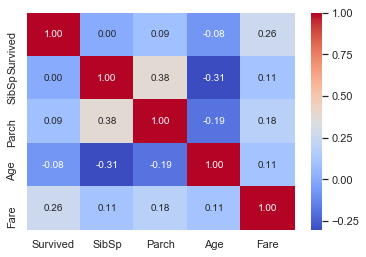

In [28]:
# 숫자로된 값(SibSp, Parch, Age, Fare 컬럼값) 과 생존가능성 간의 상관관계
g= sns.heatmap( train[["Survived", "SibSp", "Parch", "Age", "Fare"]].corr(), 
               annot=True, fmt=".2f", cmap="coolwarm")

Survived와 관계가 가장큰건 Fare 이다.(Fare이 0.26으로 가장크다.)

### SibSp (형제 자매 & 배우자)

C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


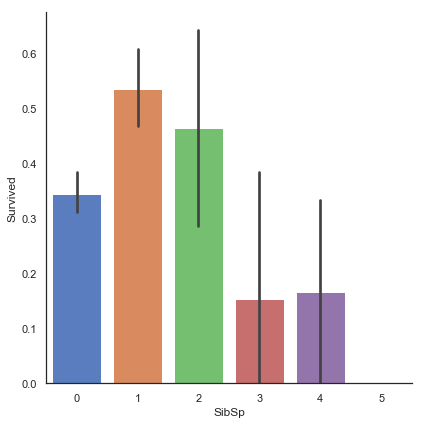

In [29]:
# Explore SibSp feature vs Survived (SibSp와 Survived간의 관계)
g= sns.catplot( x="SibSp", y="Survived", data=train, kind="bar", height=6, palette="muted")

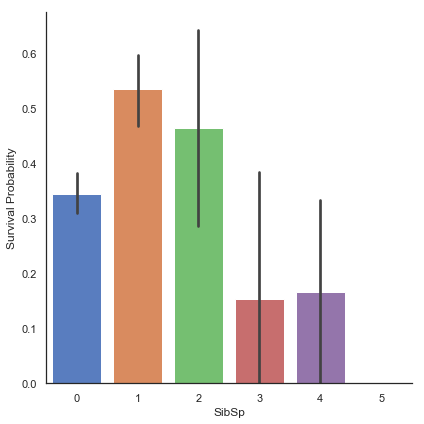

In [30]:
g= sns.catplot( x="SibSp", y="Survived", data=train, kind="bar", height=6, palette="muted")
g= g.set_ylabels("Survival Probability")

# y축이 Survival 컬럼에서 Survival Probability 로 바뀜.

개인으로 탑승한 승객( SibSp=0)이나 SibSp=1~2인 승객은 더 살아 남을 가능성이 높다
SibSp>=3 인 승객보다

## Parch (부모& 자식)

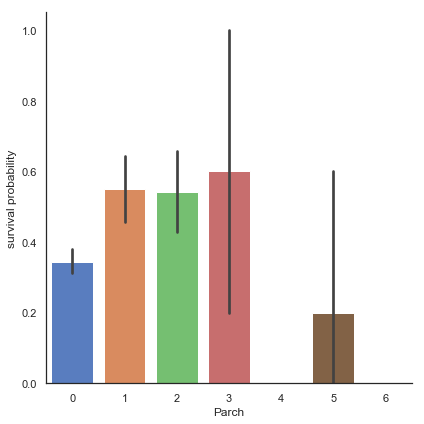

In [31]:
# Explore Parch feature vs Survived

g= sns.catplot( x="Parch", y="Survived", data=train, kind="bar", 
               height=6, palette="muted")

g= g.set_ylabels("survival probability")

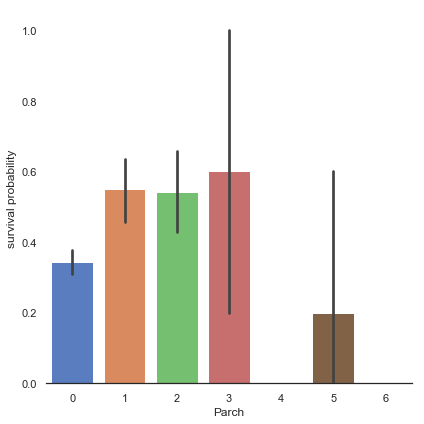

In [32]:
# Explore Parch feature vs Survived

g= sns.catplot( x="Parch", y="Survived", data=train, kind="bar", 
               height=6, palette="muted")
g.despine(left=True) # 왼쪽(y)축을 없앰

g= g.set_ylabels("survival probability")

작은 가족이 더 생존가능성이 높다 single(parch=0)이나 medium(parch=3,4), large(parch=5,6) 

그러나 parch=3인 승객의 경우에는 생존가능성에 대한 편차가 매우 크다..

(검은색 선이 길수록 편차가 큰거같다)

## Age

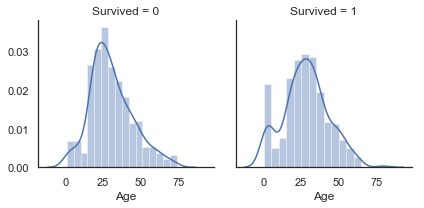

In [33]:
# Age feature 과 Survived 사이의 관계를 탐색해봅니다.
g= sns.FacetGrid(train, col='Survived') # survived=0, 1이냐에따라서 나눴다.
g= g.map(sns.distplot, 'Age') # 'Age'를 주축으로했다.

사망자(survived=0)
 25세 근처가 가장 높음.
 나이가 많은 연령대50이상 막대높이가 낮음 
 
 => 사망가능성이 없다는건가?

생존자(survived=1)
 어린이이나 유아(가장왼쪽막대)가 생존률 높은편 (사망률도 낮음)
 그런데 50세 이상부터 생존률 낮음(막대가 낮음) 75세이상은 거의 희박...
 
   => 생존가능성 없는데? (이건 좀 맞지 않는듯..)
 
 
 
 그런데 이상하다.. 25세근처는 생존률이 높네..
 근데 사망률도 25세근처가 가장 높음
 뭔가 안맞음.... 
 
 그래서 나이(Age)는 Survived(생존관계)랑 다른 컬럼에 비해 관련성이 멀다.

### Explore Age Distribution

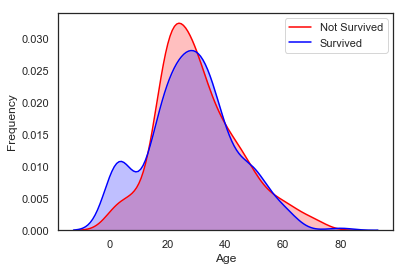

In [34]:
g=sns.kdeplot( train['Age'][ (train['Survived']==0) & (train['Age'].notnull() )], 
                color='Red', shade=True )
g=sns.kdeplot( train['Age'][ (train['Survived']==1) & (train['Age'].notnull() )],
                color='Blue', shade=True)

# x축, y축
g.set_xlabel('Age') #나이(x축)
g.set_ylabel('Frequency') #빈도수(y축)

# 범례 작은네모 빨간선, 파란선 알려주는 애들
g= g.legend(['Not Survived', 'Survived'])

## Fare

In [35]:
dataset['Fare'].isnull().sum()

1

In [36]:
# Fill Fare missing values with the median value
# fare 컬럼에 missing value 대신 median value를 채운다.

dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].median() )

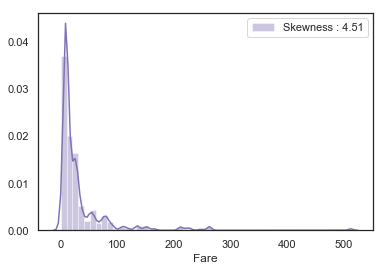

In [37]:
# Explore Fare distribution (Fare 컬럼에 대한 분포)
# skewness: 뒤틀림, 비뚤어진, 기울어진
g= sns.distplot( dataset['Fare'], color='m', label='Skewness : %.2f'%(dataset['Fare'].skew() ))
g= g.legend( loc='best')

In [38]:
# log 함수를 취한다 Fare를 skewness를 감소
dataset['Fare'] = dataset['Fare'].map( lambda i : np.log(i) if i>0 else 0)
#  i>0이면 np.log(i) 값을 넣고, i<=0 이면 0을 넣는다.

In [39]:
y=lambda i: np.log(i) if i>0 else 0
print(y(100))
print(y(-100))

4.605170185988092
0


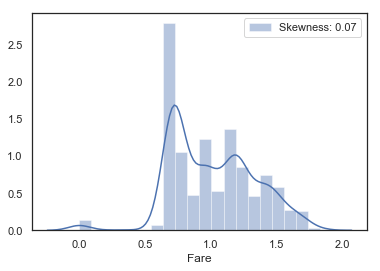

In [40]:
# 로그가 취해진 Fare 분포
# log 함수를 취한다 Fare를 skewness를 감소
dataset['Fare'] = dataset['Fare'].map( lambda i : np.log(i) if i>0 else 0)
g= sns.distplot( dataset['Fare'], color='b', label='Skewness: %.2f' %(dataset['Fare'].skew()) )
g= g.legend(loc='best')

## Categorical Values

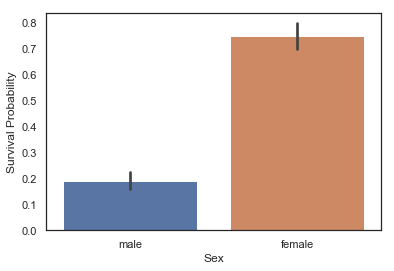

In [41]:
g= sns.barplot( x='Sex', y='Survived', data=train)
g= g.set_ylabel('Survival Probability')

In [42]:
train [ ['Sex', 'Survived']] # 성별과 survived만 나타냄

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
5,male,0
6,male,0
7,male,0
8,female,1
9,female,1


In [43]:
train[ ['Sex', 'Survived']].groupby('Sex')

#pandas.groupby(컬럼) => GroupBy객체를 생성..

In [44]:
train[ ['Sex', 'Survived']].groupby('Sex').mean() # mean:그룹별 평균을 나타낸다.

#생존 가능성: 여성> 남성

,Survived
Sex,
female,0.747573
male,0.190559


## Pclass

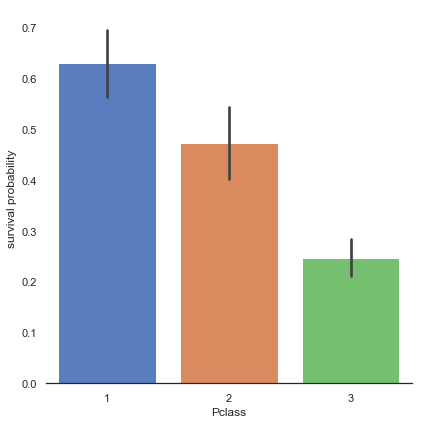

In [45]:
# Explorer Pclass vs Survived
# 탑승객 클래스 생존가능성 pclass=1>2>3 
g= sns.catplot( x="Pclass", y="Survived", data=train, kind="bar", height=6, palette='muted')
g.despine(left=True)
g= g.set_ylabels('survival probability')

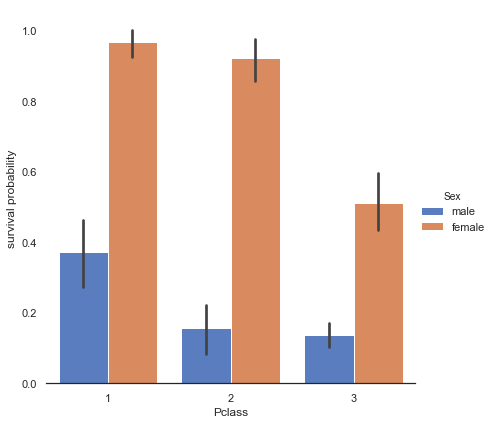

In [46]:
# Explore Pclass vs Survived by Sex
# pclass별로 성별을 나타냄
g= sns.catplot( x='Pclass', y='Survived', hue='Sex', data=train, height=6, kind='bar', palette='muted')
g.despine(left=True)
g =g.set_ylabels('survival probability')

pclass 상관없이 여성이 제일 생존률높음
그중에서도 pclass=1,2인 여성이 생존률 제일높음

## Embarked

In [47]:
dataset['Embarked'].isnull()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1269    False
1270    False
1271    False
1272    False
1273    False
1274    False
1275    False
1276    False
1277    False
1278    False
1279    False
1280    False
1281    False
1282    False
1283    False
1284    False
1285    False
1286    False
1287    False
1288    False
1289    False
1290    False
1291    False
1292    False
1293    False
1294    False
1295    False
1296    False
1297    False
1298    False
Name: Embarked, Length: 1299, dtype: bool

In [48]:
dataset['Embarked'].isnull().sum() # null인게 2개있다.

2

In [49]:
# Fill Embarked nan values of dataset set with 'S' most frequent value
# dataset['Embarked']가 null이면 'S'로 대신채워넣어라~
dataset['Embarked']= dataset['Embarked'].fillna('S')
# 2개 Embarked가 널인 데이터를 S로 채워넣었다~~

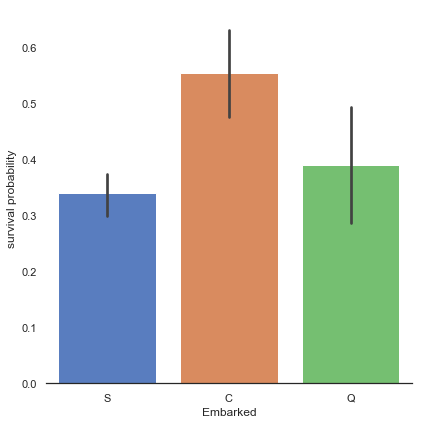

In [50]:
# Explore Embarked vs Survived
g= sns.catplot( x='Embarked', y='Survived', data=train, height=6, kind='bar', palette='muted')
g.despine(left=True)
g= g.set_ylabels('survival probability')

Embarked=C인곳이 가장 생존가능성이 높다...

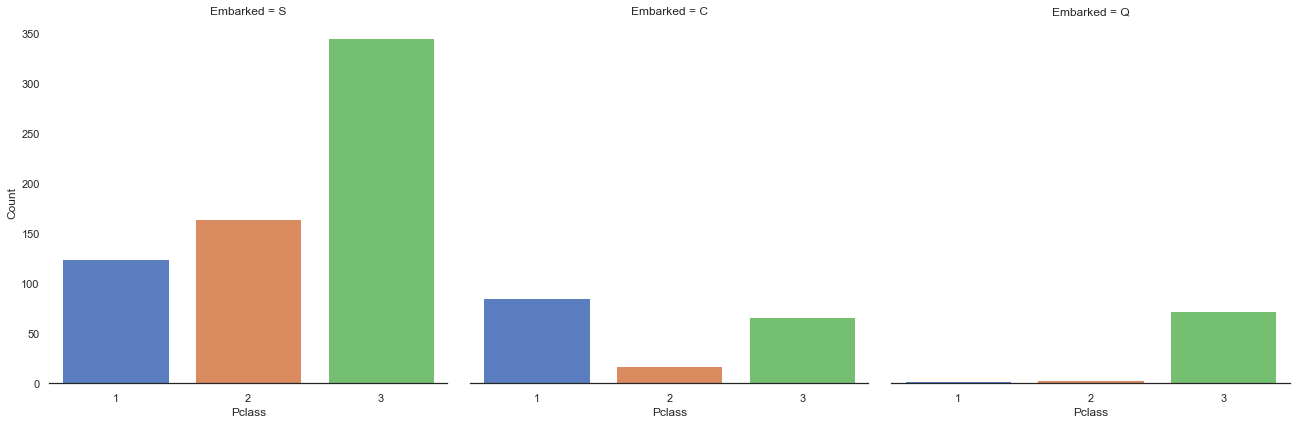

In [51]:
# Explore Pclass & Embarked

g= sns.catplot( 'Pclass', col='Embarked', data=train, height=6, kind='count', palette='muted')
g.despine(left=True)
g=g.set_ylabels('Count')

Embarked=S, Q는 Pclass=3인 경우가 많다. 


Pclass상관없이 Embarked=S는 다른지역(C,Q)보다 탑승인원이 많다.


그런데 Embarked=C는 Pclass=1이 제일 높다(3도 높은편이지만)

# Filling missing values
## Age

In [52]:
dataset['Age'].isnull().sum() #dataset['Age'] 중 256개나 Age가 null이다! 값을 어떻게 채우지?

256

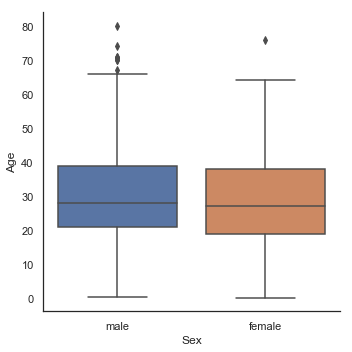

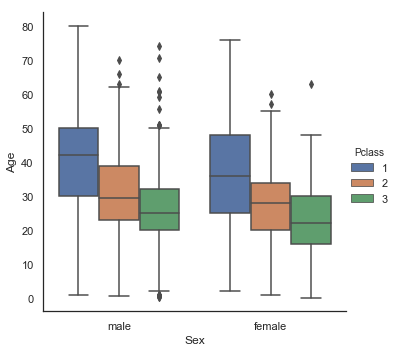

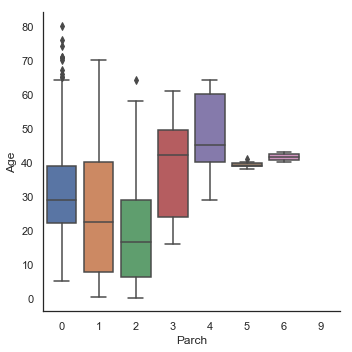

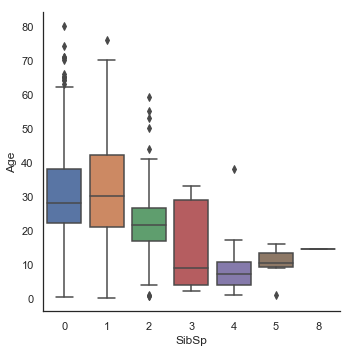

In [53]:
# Explore Age vs Sex, Parch, Pclass , SibSp
g= sns.catplot( y='Age', x='Sex', data=dataset, kind='box' )
g= sns.catplot( y='Age', x='Sex', hue='Pclass', data=dataset, kind='box')
g= sns.catplot( y='Age', x='Parch', data=dataset, kind='box')
g= sns.catplot( y='Age', x='SibSp', data=dataset, kind='box')

나이(Age) 분포에서 남성 및 여성의 하위 인구 집단에서 동일하기 때문에
Sex 는 Age를 예측하는데 유익하지 않습니다.

그러나 1등석 승객은 2등석 승객보다 나이가 많고
2등석 승객은 3등석 승객보다 나이가 많습니다.

또한 부모, 자녀가 많은 남자 승객일 수록 나이가 많으며 
형제/배우자가 있는 남자 승객일 수록 젊었습니다.

In [54]:
# 남자: Sex=0
# 여자: Sex=1
dataset['Sex']=dataset['Sex'].map({'male':0, 'female':1})

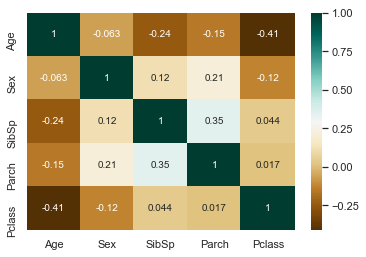

In [55]:
g=sns.heatmap( dataset[ ['Age', 'Sex', 'SibSp', 'Parch', 'Pclass']].corr(), cmap='BrBG', annot=True )

Age는 Sex와 상관없다. (0에 근접할수록 상관관계가 없다.)

Age는 Parch, Pclass, SibSp와 음의 상관 관계로 상관있습니다.

Age 증가 => Parch, SibSp, Pclass 감소


In [56]:
# Filling missing value of Age

# Fill Age with the median age of similar rows according to Pclass, Parch, and SibSp
# dataset['Age']가 NaN(NULL)인 데이터의 인덱스를 추출
index_NaN_age= list( dataset['Age'][dataset['Age'].isnull()].index )

for i in index_NaN_age:
    age_med = dataset['Age'].median() # Age 평균값
    age_pred = dataset['Age'][ ((dataset['SibSp']==dataset.iloc[i]['SibSp'])&(dataset['Parch']==dataset.iloc[i]['Parch']) & (dataset['Pclass']==dataset.iloc[i]['Pclass']))].median()
    
    if not np.isnan(age_pred):#age_pred 예측이 NaN이 아니라면 NAN인 데이터대신에 대입..
        dataset['Age'].iloc[i]=age_pred #
        
    else:# 예측값이 NaN이다...
        dataset['Age'].iloc[i]=age_med #평균값을 넣는다.

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


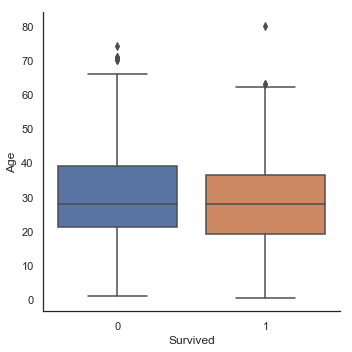

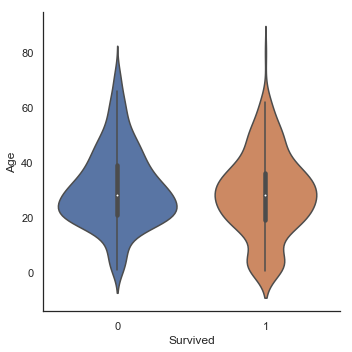

In [57]:
g= sns.catplot( x='Survived', y='Age', data=train, kind='box')
g= sns.catplot( x='Survived', y='Age', data=train, kind='violin')

사망자와 생존자의 나이 중간값 차이가 안남..

# Feature Engineering

## Name/Title

In [58]:
dataset['Name']

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
5                                        Moran, Mr. James
6                                 McCarthy, Mr. Timothy J
7                          Palsson, Master. Gosta Leonard
8       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                     Nasser, Mrs. Nicholas (Adele Achem)
10                        Sandstrom, Miss. Marguerite Rut
11                               Bonnell, Miss. Elizabeth
12                         Saundercock, Mr. William Henry
13                            Andersson, Mr. Anders Johan
14                   Vestrom, Miss. Hulda Amanda Adolfina
15                       Hewlett, Mrs. (Mary D Kingcome) 
16                                   Rice, Master. Eugene
17            

In [59]:
dataset['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [60]:
dtitle0 = [ i.split(',') for i in dataset['Name']]
dtitle0
# 'Braund, Mr. Owen Harris' => [ 'Braund', 'Mr.Owen Harris']

[['Braund', ' Mr. Owen Harris'],
 ['Cumings', ' Mrs. John Bradley (Florence Briggs Thayer)'],
 ['Heikkinen', ' Miss. Laina'],
 ['Futrelle', ' Mrs. Jacques Heath (Lily May Peel)'],
 ['Allen', ' Mr. William Henry'],
 ['Moran', ' Mr. James'],
 ['McCarthy', ' Mr. Timothy J'],
 ['Palsson', ' Master. Gosta Leonard'],
 ['Johnson', ' Mrs. Oscar W (Elisabeth Vilhelmina Berg)'],
 ['Nasser', ' Mrs. Nicholas (Adele Achem)'],
 ['Sandstrom', ' Miss. Marguerite Rut'],
 ['Bonnell', ' Miss. Elizabeth'],
 ['Saundercock', ' Mr. William Henry'],
 ['Andersson', ' Mr. Anders Johan'],
 ['Vestrom', ' Miss. Hulda Amanda Adolfina'],
 ['Hewlett', ' Mrs. (Mary D Kingcome) '],
 ['Rice', ' Master. Eugene'],
 ['Williams', ' Mr. Charles Eugene'],
 ['Vander Planke', ' Mrs. Julius (Emelia Maria Vandemoortele)'],
 ['Masselmani', ' Mrs. Fatima'],
 ['Fynney', ' Mr. Joseph J'],
 ['Beesley', ' Mr. Lawrence'],
 ['McGowan', ' Miss. Anna "Annie"'],
 ['Sloper', ' Mr. William Thompson'],
 ['Palsson', ' Miss. Torborg Danira'],
 [

In [61]:
# dtitle1 = dtitle0[1]
# [ 'Braund', 'Mr.  Owen Harris']의 [1]번째...=> 'Mr. Owen Harris'
dtitle1= [i.split(',')[1] for i in dataset['Name']]
dtitle1

[' Mr. Owen Harris',
 ' Mrs. John Bradley (Florence Briggs Thayer)',
 ' Miss. Laina',
 ' Mrs. Jacques Heath (Lily May Peel)',
 ' Mr. William Henry',
 ' Mr. James',
 ' Mr. Timothy J',
 ' Master. Gosta Leonard',
 ' Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
 ' Mrs. Nicholas (Adele Achem)',
 ' Miss. Marguerite Rut',
 ' Miss. Elizabeth',
 ' Mr. William Henry',
 ' Mr. Anders Johan',
 ' Miss. Hulda Amanda Adolfina',
 ' Mrs. (Mary D Kingcome) ',
 ' Master. Eugene',
 ' Mr. Charles Eugene',
 ' Mrs. Julius (Emelia Maria Vandemoortele)',
 ' Mrs. Fatima',
 ' Mr. Joseph J',
 ' Mr. Lawrence',
 ' Miss. Anna "Annie"',
 ' Mr. William Thompson',
 ' Miss. Torborg Danira',
 ' Mrs. Carl Oscar (Selma Augusta Emilia Johansson)',
 ' Mr. Farred Chehab',
 ' Miss. Ellen "Nellie"',
 ' Mr. Lalio',
 ' Don. Manuel E',
 ' Mrs. William Augustus (Marie Eugenie)',
 ' Miss. Mary Agatha',
 ' Mr. Edward H',
 ' Mr. Edgar Joseph',
 ' Mr. Alexander Oskar',
 ' Mr. Hanna',
 ' Mr. Ernest Charles',
 ' Miss. Augusta Maria',
 ' Mis

In [62]:
# Mr. Owen Harris 에서 ==> '.'을 기준으로 [Mr, '  Owen Harris' ]로 분리
# 거기서 0번째 열이므로 Mr
dtitle2=[ i.split(',')[1].split(".") for i in dataset['Name']]
dtitle2

[[' Mr', ' Owen Harris'],
 [' Mrs', ' John Bradley (Florence Briggs Thayer)'],
 [' Miss', ' Laina'],
 [' Mrs', ' Jacques Heath (Lily May Peel)'],
 [' Mr', ' William Henry'],
 [' Mr', ' James'],
 [' Mr', ' Timothy J'],
 [' Master', ' Gosta Leonard'],
 [' Mrs', ' Oscar W (Elisabeth Vilhelmina Berg)'],
 [' Mrs', ' Nicholas (Adele Achem)'],
 [' Miss', ' Marguerite Rut'],
 [' Miss', ' Elizabeth'],
 [' Mr', ' William Henry'],
 [' Mr', ' Anders Johan'],
 [' Miss', ' Hulda Amanda Adolfina'],
 [' Mrs', ' (Mary D Kingcome) '],
 [' Master', ' Eugene'],
 [' Mr', ' Charles Eugene'],
 [' Mrs', ' Julius (Emelia Maria Vandemoortele)'],
 [' Mrs', ' Fatima'],
 [' Mr', ' Joseph J'],
 [' Mr', ' Lawrence'],
 [' Miss', ' Anna "Annie"'],
 [' Mr', ' William Thompson'],
 [' Miss', ' Torborg Danira'],
 [' Mrs', ' Carl Oscar (Selma Augusta Emilia Johansson)'],
 [' Mr', ' Farred Chehab'],
 [' Miss', ' Ellen "Nellie"'],
 [' Mr', ' Lalio'],
 [' Don', ' Manuel E'],
 [' Mrs', ' William Augustus (Marie Eugenie)'],
 ['

In [63]:
# Get Title From Name
# strip은 dtitle2결과에 해당하는 리스트원소중 공백문자를 제거한다.
dataset_title = [ i.split(',')[1].split('.')[0].strip() for i in dataset['Name'] ]

In [64]:
dataset_title

['Mr',
 'Mrs',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Mrs',
 'Mrs',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Don',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mrs',
 'Mrs',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Master',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Master',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Mr',
 'Miss',
 

In [65]:
dataset['Title']=pd.Series(dataset_title)
dataset['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [66]:
# Get Title From Name
# strip은 dtitle2결과에 해당하는 리스트원소중 공백문자를 제거한다.
dataset_title = [ i.split(',')[1].split('.')[0].strip() for i in dataset['Name'] ]
dataset['Title']= pd.Series(dataset_title)
dataset['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

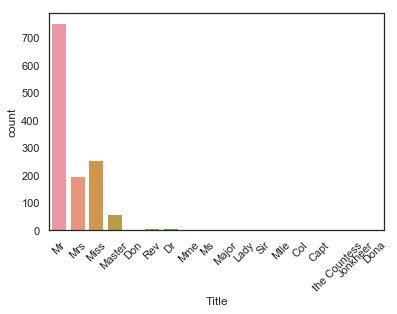

In [67]:
g = sns.countplot( x='Title', data=dataset)
g = plt.setp( g.get_xticklabels(), rotation=45)

# Mr 칭호를 갖는 사람들이짱많음

In [68]:
# Convert to categorical values Title 
dataset["Title"] = dataset["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
dataset["Title"] = dataset["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
dataset["Title"] = dataset["Title"].astype(int)

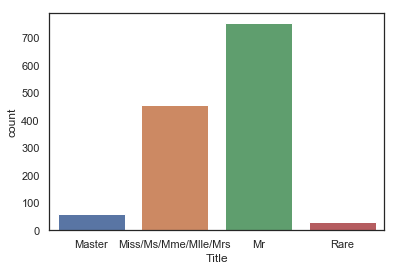

In [69]:
g= sns.countplot( dataset['Title'])
g= g.set_xticklabels(['Master', 'Miss/Ms/Mme/Mlle/Mrs', 'Mr', 'Rare'])

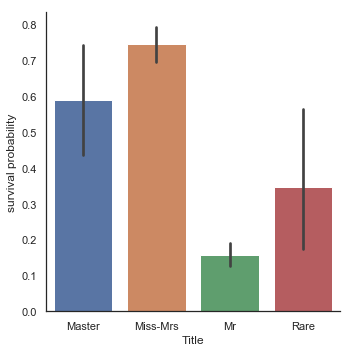

In [70]:
g= sns.catplot(x='Title', y='Survived', data=dataset, kind='bar')
g= g.set_xticklabels(['Master', 'Miss-Mrs', 'Mr', 'Rare'])
g= g.set_ylabels('survival probability')

In [71]:
# Drop Name Variable
# pd.drop : 넘겨받은 값이 삭제된 새로운 색인을 반환한다.
dataset.drop(labels=["Name"], axis=1, inplace=True)

In [72]:
## Family Size

# Family size = SibSp + Parch
dataset['Fsize']= dataset['SibSp']+dataset['Parch']+1 #본인포함+SibSp+Parch

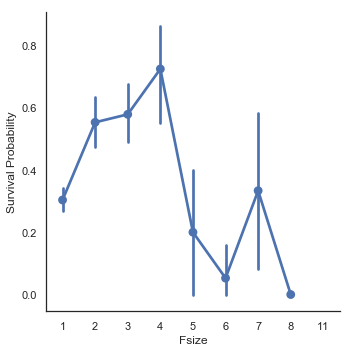

In [79]:
g = sns.catplot( x='Fsize', y='Survived', data=dataset, kind='point')
g = g.set_ylabels('Survival Probability')

가족크기(Fsize)는 생존률에 있어서 중요한 역할... 큰가족단위일수록 생존률 매우낮음.
4명 이상일때 생존률이 떨어진다.

In [81]:
# Create new feature of Family Size

dataset['Single']= dataset['Fsize'].map(lambda s: 1 if s==1 else 0)
dataset['SmallF']= dataset['Fsize'].map(lambda s: 1 if s==2 else 0)
dataset['MedF']= dataset['Fsize'].map(lambda s: 1 if (s>=3 and s<=4) else 0)
dataset['LargeF']= dataset['Fsize'].map(lambda s: 1 if s>4 else 0)

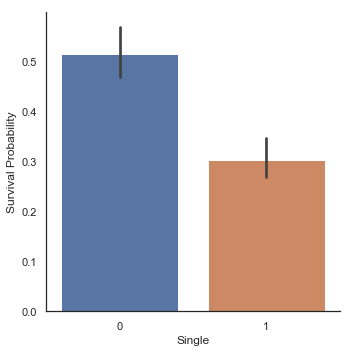

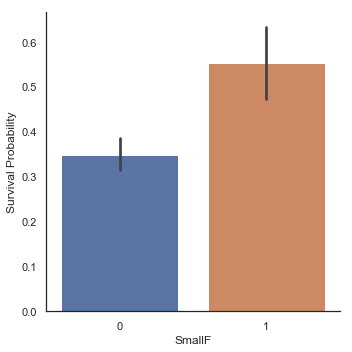

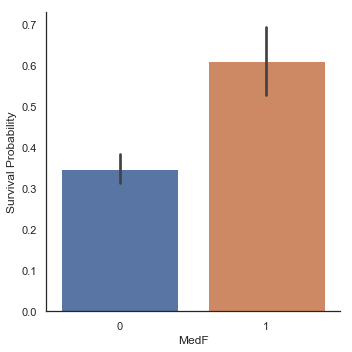

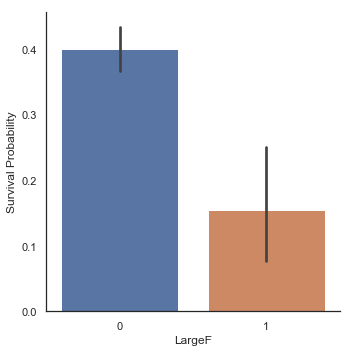

In [82]:
g=sns.catplot( x='Single', y='Survived', data=dataset, kind='bar')
g=g.set_ylabels('Survival Probability')

g=sns.catplot( x='SmallF', y='Survived', data=dataset, kind='bar')
g=g.set_ylabels('Survival Probability')

g=sns.catplot( x='MedF', y='Survived', data=dataset, kind='bar')
g=g.set_ylabels('Survival Probability')

g=sns.catplot( x='LargeF', y='Survived', data=dataset, kind='bar')
g=g.set_ylabels('Survival Probability')

Single(1): 사망률(0.5)> 생존률(0.3)

SmallF(2): 사망률(0.35)< 생존률(0.55)

MedF(3~4):   사망률(0.35)<생존률(0.6)

LargeF(5~): 사망률(0.4)>생존률(0.15)

In [83]:
# convert to indicator values Title and Embarked
# indicator value를 Title과 Embarked로 전환
dataset = pd.get_dummies(dataset, columns=['Title'])
dataset = pd.get_dummies(dataset, columns=['Embarked'], prefix='Em')

In [84]:
dataset.head()

,Age,Cabin,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,...,SmallF,MedF,LargeF,Title_0,Title_1,Title_2,Title_3,Em_C,Em_Q,Em_S
0,22.0,NaN,0.683603,0,1,3,0,1,0.0,A/5 21171,...,1,0,0,0,0,1,0,0,0,1
1,38.0,C85,1.450832,0,2,1,1,1,1.0,PC 17599,...,1,0,0,0,1,0,0,1,0,0
2,26.0,NaN,0.727559,0,3,3,1,0,1.0,STON/O2. 3101282,...,0,0,0,0,1,0,0,0,0,1
3,35.0,C123,1.379314,0,4,1,1,1,1.0,113803,...,1,0,0,0,1,0,0,0,0,1
4,35.0,NaN,0.735091,0,5,3,0,0,0.0,373450,...,0,0,0,0,0,1,0,0,0,1


## Cabin

In [85]:
dataset['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [86]:
dataset['Cabin'].describe()

count     292
unique    186
top        G6
freq        5
Name: Cabin, dtype: object

In [87]:
dataset['Cabin'].isnull().sum() # Cabin이 Null인것들의 개수 1007 

1007

In [88]:
dataset['Cabin'][ dataset['Cabin'].notnull()].head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [89]:
# Replace the Cabin number by the type of cabin 'X' if not..
# cabin 없다면 X로 대신 한다.
# pd.isnull(i)가 Null이면.. i[0]을 넣는다...
dataset['Cabin'] = pd.Series([ i[0] if not pd.isnull(i) else 'X' for i in dataset['Cabin'] ])

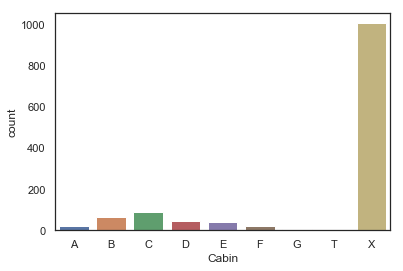

In [91]:
g= sns.countplot( dataset['Cabin'], order=['A','B','C','D','E','F','G','T','X'])

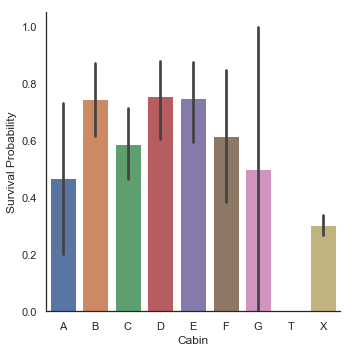

In [92]:
g=sns.catplot( y='Survived', x='Cabin', data=dataset, kind='bar', 
              order=['A','B','C','D','E','F','G','T','X'])

g= g.set_ylabels('Survival Probability')

cabin이 G와 A인 객실은 생존가능성에대한 오차가 매우크다...


B,C,D,E,F 객실이 생존가능성이 크다

In [93]:
dataset = pd.get_dummies( dataset, columns=['Cabin'], prefix='Cabin')

## Ticket 

In [94]:
dataset['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [96]:
# Treat ticket by extracting the ticket prefix
# When there is no prefix it return X.

Ticket=[]
for i in list(dataset.Ticket):
    if not i.isdigit():
        # prefix
        # . -> 없음
        # / -> 없음
        # strip() -> 좌우 빈공간 없앰
        # ' '(스페이스바)를 기준으로 나눈다.
        # 거기서 0번째
        Ticket.append( i.replace('.', '').replace('/', '').strip().split(' ')[0])
    else:
        Ticket.append('X')
        
dataset['Ticket']=Ticket
dataset['Ticket'].head()

0        A5
1        PC
2    STONO2
3         X
4         X
Name: Ticket, dtype: object

In [97]:
dataset= pd.get_dummies(dataset, columns=['Ticket'], prefix='T')

In [98]:
# Create categorical values for Pclass
# pclass값에따른 카테고리 생성
dataset['Pclass']= dataset['Pclass'].astype('category')
dataset= pd.get_dummies(dataset, columns=['Pclass'], prefix='Pc')

In [99]:
# Drop useless variables #필요없는 변수는 지운다.
dataset.drop(labels=['PassengerId'], axis=1, inplace=True)

In [100]:
dataset.head()

,Age,Fare,Parch,Sex,SibSp,Survived,Fsize,Single,SmallF,MedF,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X,Pc_1,Pc_2,Pc_3
0,22.0,0.683603,0,0,1,0.0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,38.0,1.450832,0,1,1,1.0,2,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,26.0,0.727559,0,1,0,1.0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,35.0,1.379314,0,1,1,1.0,2,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,35.0,0.735091,0,0,0,0.0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1


# Modeling

In [101]:
# 트레인데이터셋과 테스트 데이터셋 분리
train = dataset[:train_len]
test= dataset[train_len:]

test.drop(labels=['Survived'], axis=1, inplace=True)

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [102]:
# Seperate train features and label (트레인 특징과 라벨을 분리)
train['Survived']= train['Survived'].astype(int)

Y_train = train['Survived']
X_train = train.drop( labels=['Survived'], axis=1)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Simpling Modeling

In [103]:
# Cross Validate model with KFold stratified cross val
kfold = StratifiedKFold( n_splits=10)

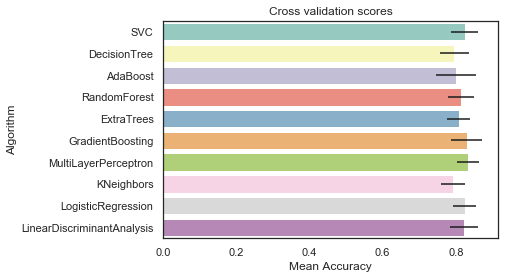

In [106]:
# Modeling step Test Differents algorithms

random_state=2
classifiers=[]
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state), 
                                     random_state=random_state, learning_rate=0.1))

classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(LinearDiscriminantAnalysis())


cv_results=[]

for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, 
                                      scoring='accuracy', cv=kfold, n_jobs=4))
    
    
cv_means=[]
cv_std=[]

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_res= pd.DataFrame( {'CrossValMeans':cv_means,
                      'CrossValerrors':cv_std,
                      'Algorithm': ['SVC', 'DecisionTree', 'AdaBoost', 'RandomForest',
                                   'ExtraTrees', 'GradientBoosting', 'MultiLayerPerceptron',
                                   'KNeighbors', 'LogisticRegression', 'LinearDiscriminantAnalysis']
                      })
g=sns.barplot('CrossValMeans', "Algorithm", data=cv_res, palette='Set3',
             orient='h', **{'xerr': cv_std})

g.set_xlabel('Mean Accuracy')
g= g.set_title('Cross validation scores')

## Hyperparameter tunning for best models

### AdaBoost

In [108]:
# meta modeling with adaboost, randomforest, extratrees, gradientBoosting

#Adaboost
DTC= DecisionTreeClassifier()

adaDTC= AdaBoostClassifier(DTC, random_state=7)

ada_param_grid={ 'base_estimator__criterion': ['gini', 'entropy'],
               'base_estimator__splitter': ['best', 'random'],
               'algorithm': ['SAMME', 'SAMME.R'],
               'n_estimators':[1,2],
               'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 1.5 ]}

gsadaDTC= GridSearchCV( adaDTC, param_grid= ada_param_grid, cv=kfold, 
                       scoring='accuracy', n_jobs=4, verbose=1)

gsadaDTC.fit(X_train, Y_train)
ada_best= gsadaDTC.best_estimator_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Done  48 tasks      | elapsed:   11.8s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:   19.5s finished


In [110]:
gsadaDTC.best_score_

0.8240635641316686

### ExtraTree

In [111]:
ExtC= ExtraTreesClassifier()

# search grid for optimal parameters
ex_param_grid={ 'max_depth': [None],
              'max_features':[1,3,10],
              'min_samples_split': [2,3,10],
              'min_samples_leaf':[1,3,10],
              'bootstrap': [False],
              'n_estimators':[100,300],
              'criterion':['gini']
              }

gsExtC= GridSearchCV( ExtC, param_grid=ex_param_grid, cv=kfold, 
                     scoring='accuracy', n_jobs=4, verbose=1)

gsExtC.fit(X_train, Y_train)

ExtC_best= gsExtC.best_estimator_

#BestScore
gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   24.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   48.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.1min finished


0.8342792281498297

### RandomForest

In [113]:
# RFC Parameters Tunning
RFC= RandomForestClassifier()

# Search grid for optimal parameters
rf_param_grid= { 'max_depth':[None],
               'max_features':[1,3,10],
               'min_samples_split': [2,3,10],
               'min_samples_leaf': [1,3,10],
               'bootstrap':[False],
               'n_estimators':[100,300],
               'criterion':['gini']
               }

gsRFC= GridSearchCV(RFC, param_grid=rf_param_grid, cv=kfold, scoring='accuracy',
                   n_jobs=4, verbose=1)

gsRFC.fit(X_train, Y_train)

RFC_best= gsRFC.best_estimator_

#Best Score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   19.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   42.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  1.8min finished


0.8331441543700341

### Gradient Boosting Tunning

In [114]:
GBC= GradientBoostingClassifier()
gb_param_grid={'loss':['deviance'],
              'n_estimators':[100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4,8],
              'min_samples_leaf': [100, 150],
              'max_features':[0.3, 0.1]
              }

gsGBC= GridSearchCV(GBC, param_grid=gb_param_grid, cv=kfold, scoring='accuracy',
                   n_jobs=4, verbose=1)

gsGBC.fit( X_train, Y_train )

GBC_best= gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   13.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   22.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   39.2s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   57.2s finished


0.8308740068104427

## SVC Classifier

In [115]:
SVMC= SVC(probability=True)

svc_param_grid={'kernel':['rbf'],
               'gamma': [0.001, 0.01, 0.1, 1],
               'C':[1, 10, 50, 100, 200, 300, 1000]
               }

gsSVMC = GridSearchCV(SVMC, param_grid=svc_param_grid, cv=kfold, 
                      scoring='accuracy', n_jobs=4, verbose=1)

gsSVMC.fit(X_train, Y_train)

SVMC_best= gsSVMC.best_estimator_

#Best Score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   19.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   45.4s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:  1.1min finished


0.8297389330306469

### Plot learning curves

오버피팅 확인

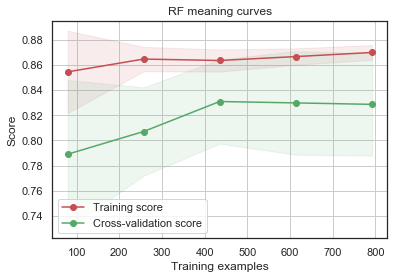

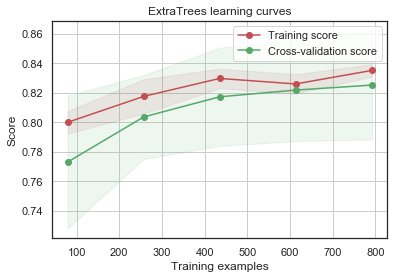

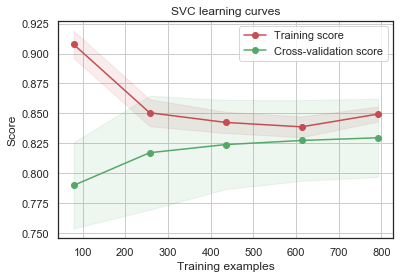

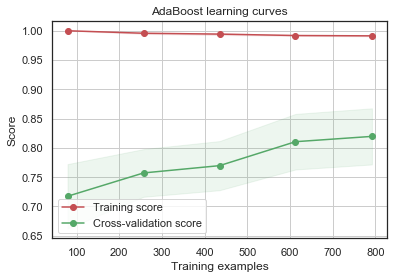

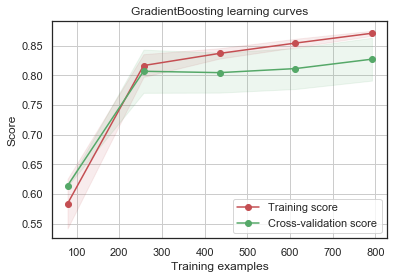

In [122]:
def plot_learning_curve( estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1,1.0,5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve( estimator, X,y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean= np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    
    test_scores_mean= np.mean(test_scores, axis=1)
    test_scores_std= np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between( train_sizes, train_scores_mean-train_scores_std,
                    train_scores_mean+train_scores_std, alpha=0.1, color="r")
    
    plt.fill_between( train_sizes, test_scores_mean-test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color='g')
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    
    plt.legend(loc='best')
    return plt

g=plot_learning_curve(gsRFC.best_estimator_, "RF meaning curves", X_train, Y_train, cv=kfold)
g=plot_learning_curve(gsExtC.best_estimator_, "ExtraTrees learning curves", X_train, Y_train, cv=kfold)
g=plot_learning_curve(gsSVMC.best_estimator_, "SVC learning curves", X_train, Y_train, cv=kfold)
g=plot_learning_curve(gsadaDTC.best_estimator_, "AdaBoost learning curves", X_train, Y_train, cv=kfold)
g=plot_learning_curve(gsGBC.best_estimator_, "GradientBoosting learning curves", X_train, Y_train, cv=kfold)

gradient boosting과 AdaBoost분류모델은 

트레이닝 데이터셋을 오버피팅하는 경향이있다.

점점 증가하고 있는 cross-validation 커브에 따르면

GradientBoosting과 AdaBoost가 트레이닝 데이터셋에 더 적합하다

## Feature importance of tree based classifiers

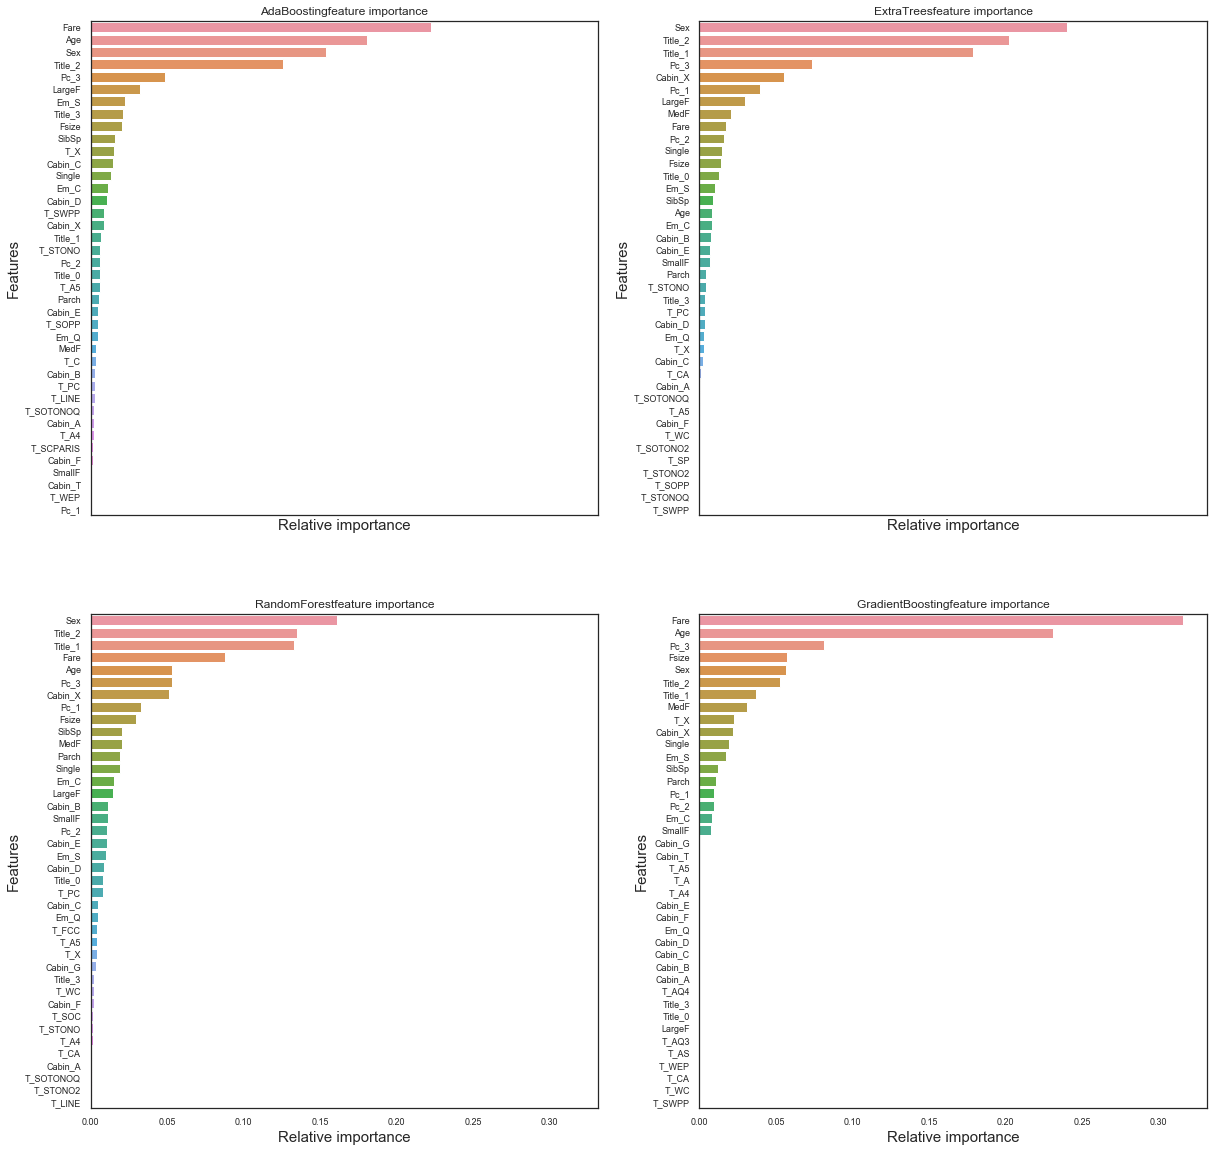

In [123]:
nrows= ncols=2

fig, axes = plt.subplots( nrows=nrows, ncols=ncols, 
                         sharex='all', figsize=(20,20))

names_classifiers=[ ('AdaBoosting', ada_best), ('ExtraTrees', ExtC_best),
                  ('RandomForest', RFC_best), ('GradientBoosting', GBC_best)]

nclassifier=0
for row in range(nrows):
    for col in range(ncols):
        name= names_classifiers[nclassifier][0]
        classifier= names_classifiers[nclassifier][1]
        indices= np.argsort(classifier.feature_importances_)[::-1][:40]
        g=sns.barplot(y=X_train.columns[indices][:40],
                     x=classifier.feature_importances_[indices][:40],
                     orient='h',
                     ax=axes[row][col])
        
        g.set_xlabel('Relative importance', fontsize=15)
        g.set_ylabel('Features', fontsize=15)
        g.tick_params(labelsize=9)
        g.set_title(name +'feature importance')
        nclassifier+=1

Pc_1,_2,_3 : Fare은 탑승객의 신분과 관련

sex, 타이틀 title_2, title_3은 성별과 관련

Age와 타이틀 title_1(master)은 나이를 의미

Fsize, LargeF, MedF, Single 은 탑승객의가족단위를 의미.

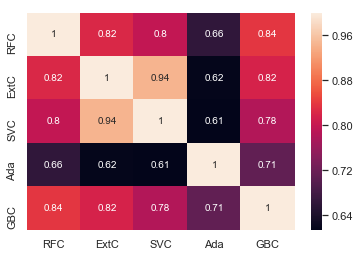

In [125]:
test_Survived_RFC= pd.Series(RFC_best.predict(test), name='RFC' )

test_Survived_ExtC= pd.Series(ExtC_best.predict(test), name='ExtC')

test_Survived_SVMC = pd.Series(SVMC_best.predict(test), name='SVC')

test_Survived_AdaC= pd.Series(ada_best.predict(test), name='Ada')

test_Survived_GBC = pd.Series(GBC_best.predict(test), name="GBC")


# concatenate all classifier results: 모든 classfier 결과들을 연결..
ensemble_results=pd.concat([test_Survived_RFC,test_Survived_ExtC,
                            test_Survived_SVMC,test_Survived_AdaC,
                            test_Survived_GBC ], axis=1)

g=sns.heatmap(ensemble_results.corr(), annot=True)

# Esemble modeling

In [126]:
## Combining models
votingC= VotingClassifier( estimators=[('rfc', RFC_best),('svc', SVMC_best),
                                       ('adac', ada_best),('gbc', GBC_best)],
                          voting='soft', n_jobs=4)

votingC= votingC.fit(X_train, Y_train)

# Prediction

In [130]:
test_Survived= pd.Series(votingC.predict(test), name='Survived')
results=pd.concat([IDtest, test_Survived], axis=1)
results.to_csv('ensemble_python_voting2.csv', index=False) #numpy 버젼이 작아야함.. 1.12.1로 다운그레이드해야됨.

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [131]:
import numpy as np
np.version.version 

'1.15.4'